# Training Session

In [1]:
import pickle

from build_vocab import *
from build_answers import *


In [2]:
# train2014
answers_path = '/home/ubuntu/dotCuda/notebook/answers.pkl'
with open(answers_path, 'rb') as f:
    answers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
# val2014
answers_path = '/home/ubuntu/dotCuda/notebook/valanswers.pkl'
with open(answers_path, 'rb') as f:
    valanswers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/valvocab.pkl'
with open(vocab_path, 'rb') as f:
    valvocab = pickle.load(f)

In [3]:
from dataset import *

train_dataset = COCODataset(vocab=vocab, answers=answers)
val_dataset = COCODataset(vocab=valvocab, answers=valanswers)

loading VQA annotations and questions into memory...
0:00:07.428882
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:08.251607
creating index...
index created!


### Network Model

In [4]:
# import network 
from network_v5 import *

In [5]:
import torch
device = torch.device('cuda')

vocab_size = len(vocab)
model = ConcatNet(vocab_size).to(device)

### Trainer Class

In [6]:
# import trainer
from trainer import VQATrainer

trainer = VQATrainer(model, device)

### Train!

In [7]:
import telegram_send

def print_tele(*msgs):
    telegram_send.send(messages=msgs)

In [ ]:
trained_model, statistics = trainer.train(train_dataset, val_dataset, collate_fn=collate, e_break=10)

Epoch 0 of 5
  Training...
   >> Epoch finished with loss 608.49497 and accuracy 0.001 in 10.2847s
  Validating...
   >> Epoch finished with loss 616.49066 and accuracy 0.001 in 3.7217s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f63b9d164e0>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

Epoch 1 of 5
  Training...
   >> Epoch finished with loss 608.48289 and accuracy 0.001 in 10.1257s
  Validating...
   >> Epoch finished with loss 616.49339 and accuracy 0.001 in 3.7321s
Epoch 2 of 5
  Training...
   >> Epoch finished with loss 624.49104 and accuracy 0.001 in 10.1707s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f63b7b40080>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

Process Process-22:
Process Process-23:
Process Process-21:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-24:
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/process.py", line 258, 

KeyboardInterrupt: 

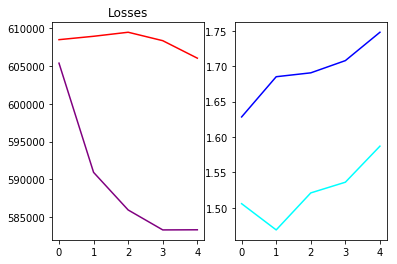

In [3]:
import pickle

with open('stats.st', 'rb') as statfile:
    statistic = pickle.load(statfile)
    
#print(statistic)

#trainer.plot_over_epoch()
from trainer import VQATrainer

trainer = VQATrainer(None, None)
trainer.statistics = statistic

trainer.plot_over_epoch()